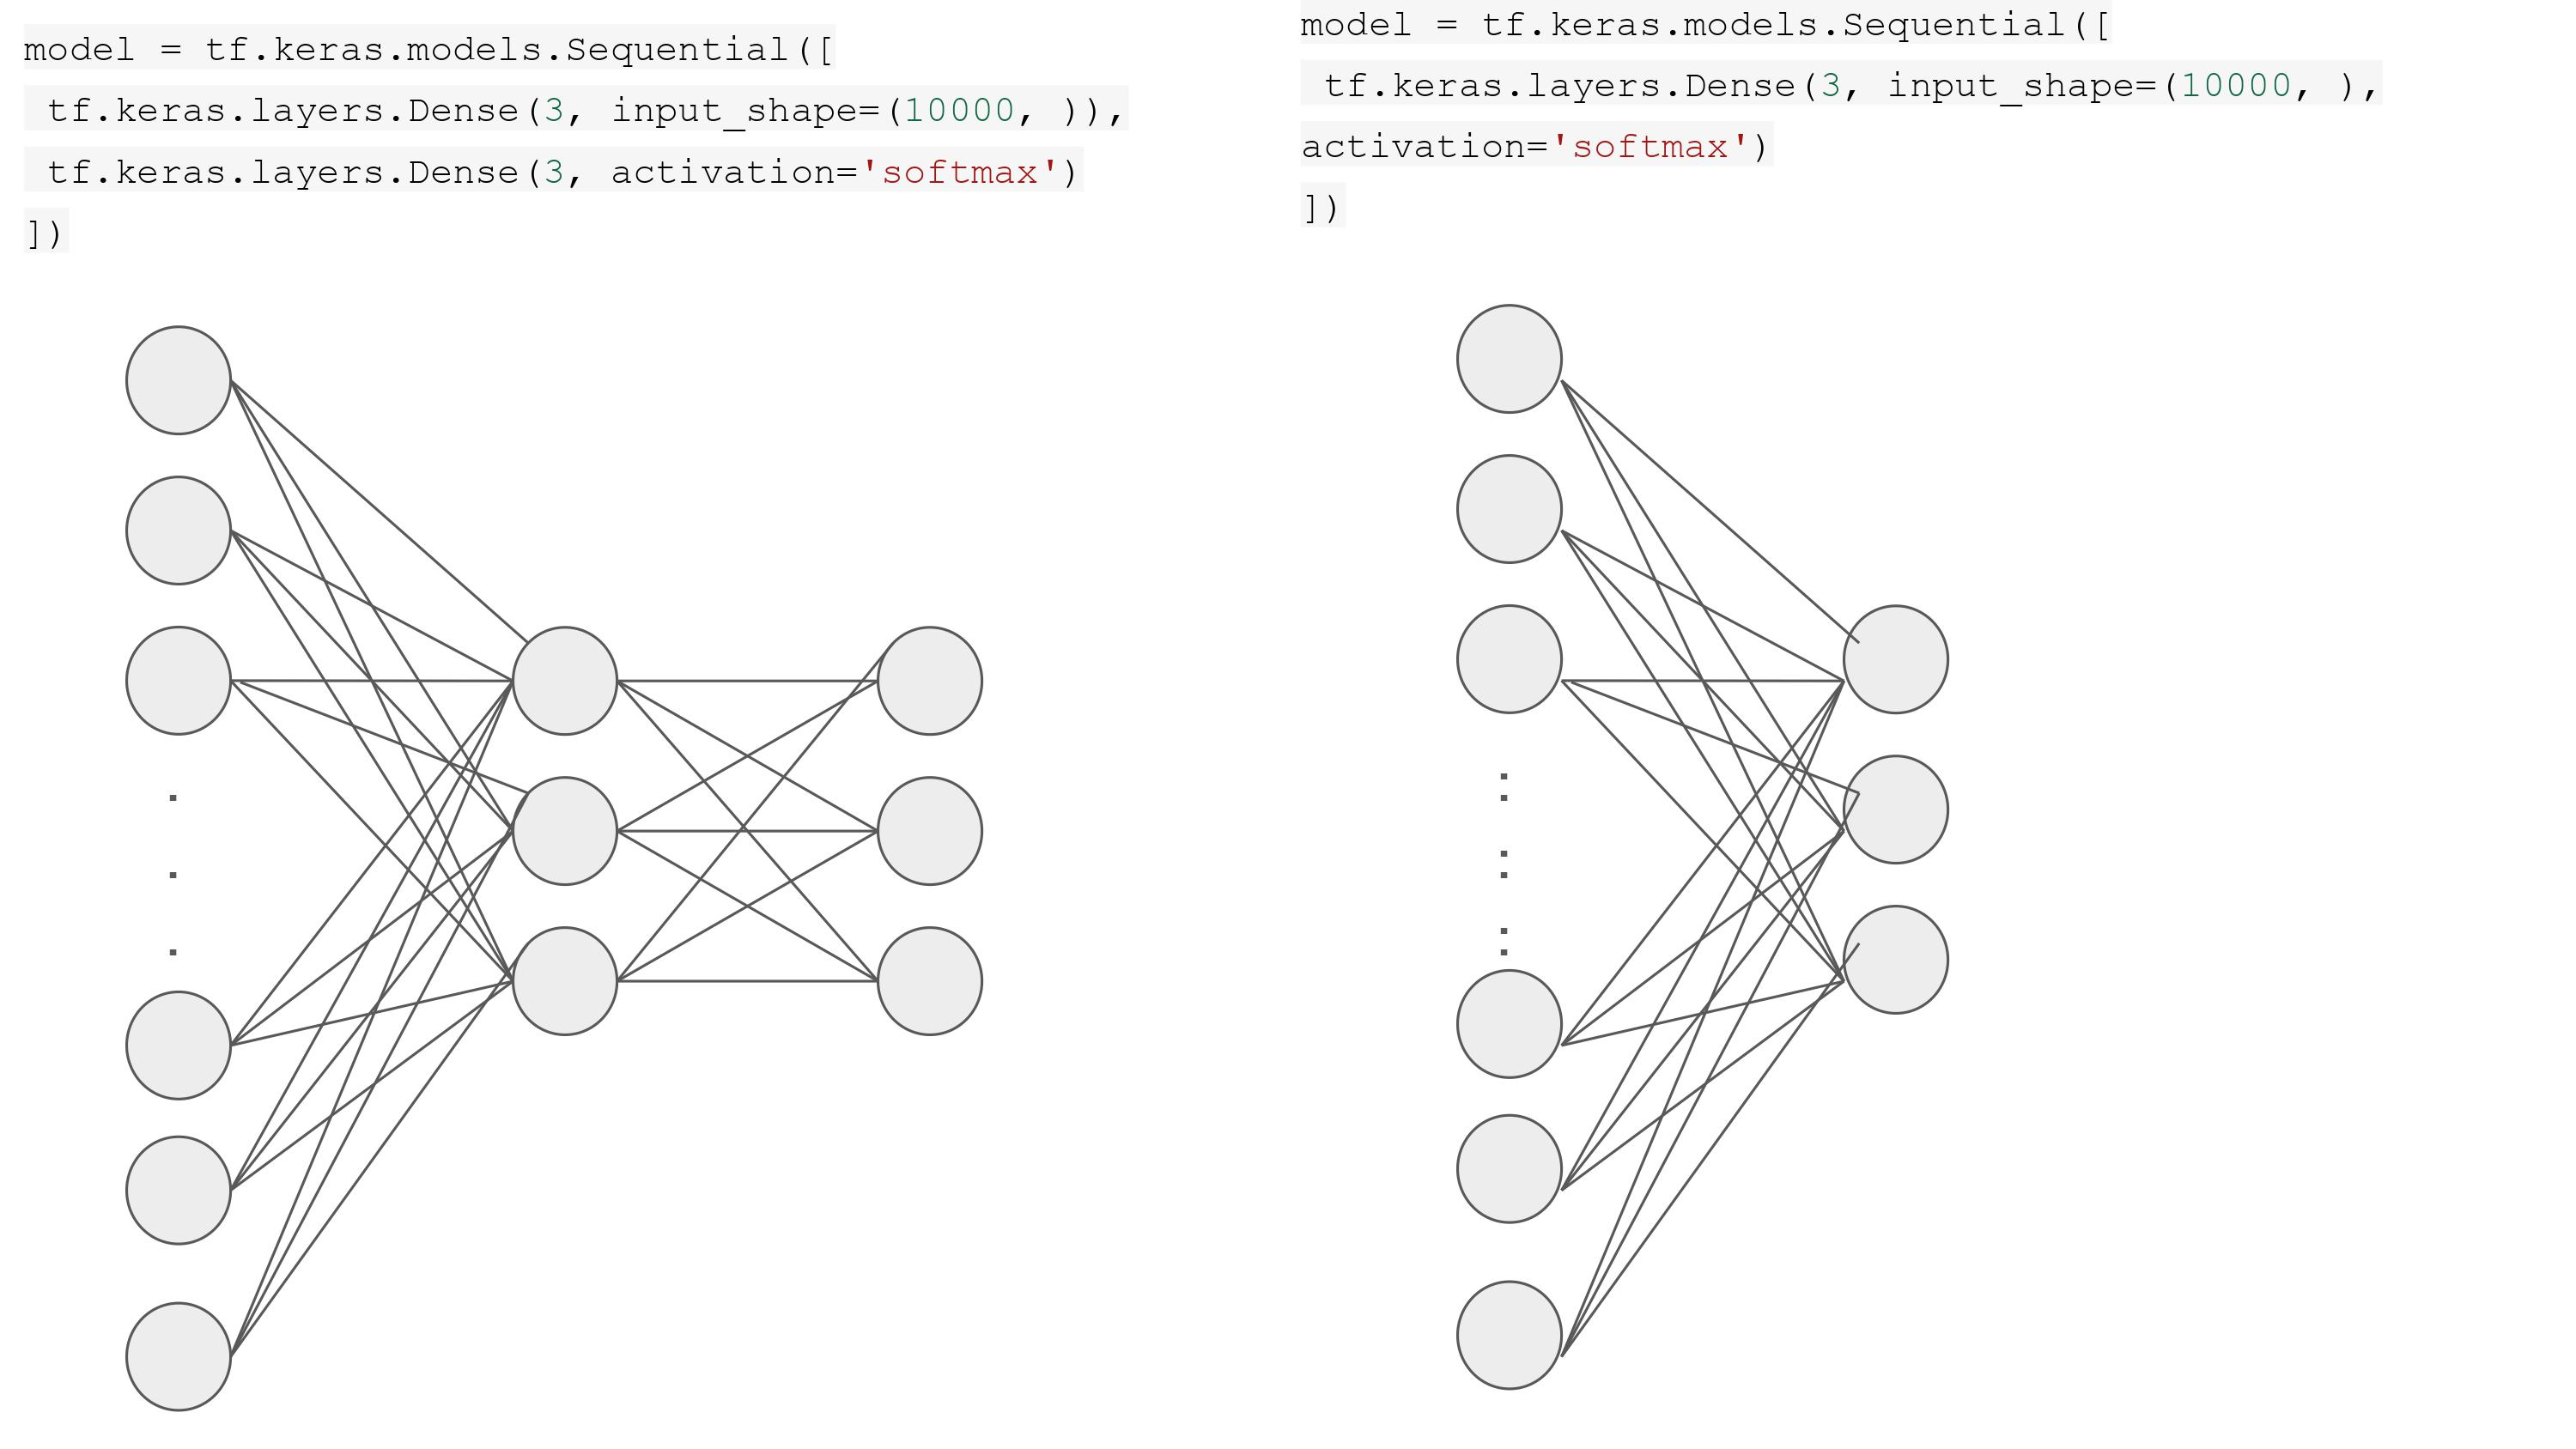

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [1]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import dataframe_image as dfi
import df2img


In [12]:
# mat = scipy.io.loadmat('EQ13_data.mat')
mat1 = scipy.io.loadmat('case1_random_forest.mat')
mat2 = scipy.io.loadmat('case2_3nodes.mat')
mat3 = scipy.io.loadmat('case3_extended_Delta1.mat')
mat4 = scipy.io.loadmat('case4_quantum.mat')

# mat_squ = scipy.io.loadmat('squeezed_va.mat')
# mat_squ = scipy.io.loadmat('squeezed_va_narrow.mat')
# mat_squ = scipy.io.loadmat('squeezed_va_1000.mat')
mat_m_2 = scipy.io.loadmat('case2_m2_1000.mat')

n_m_2 = mat_m_2['n_all']
g2_m_2 = mat_m_2['g2_m']

n1 = mat1['n1_selected']
n2 = mat1['n2_selected']
g2_case1 = mat1['g2']

n1_case2 = mat2['n1_selected']
n2_case2 = mat2['n2_selected']
g2_case2 = mat2['g2']

ns3 = mat3['ns']
g2_case3 = abs(mat3['g2_a'])

# ns4 = mat4['all_ns']
# g2_case4 = abs(mat4['g2'])


In [16]:
# np.shape(n_squ)
n_case3_extended_Delta = []
# g2_squ_1000 = []
for i in range(400):
    n_case3_extended_Delta.append(ns3[0][i][0])

X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta,g2_case3, test_size=0.25)

In [20]:
regressor_2 = RandomForestRegressor()
regressor_2.fit(X_train_c3_ex, Y_train_c3_ex)


Y_predict_RFR_m_2 = regressor_2.predict(X_test_c3_ex) 

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


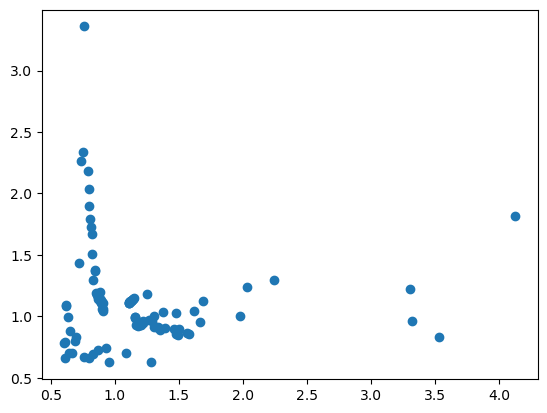

In [24]:
plt.scatter(Y_test_c3_ex, Y_predict_RFR_m_2)

In [ ]:
# np.shape(n_squ)
n_m_2_new = []
# g2_squ_1000 = []
for i in range(1000):
    n_m_2_new.append(n_m_2[0][i][0])
    # g2_squ_1000.append
# np.shape(g2_squ)


In [ ]:
np.shape(n_m_2_new)

In [111]:
ns2 = []
for i in range(1000):
    ns2.append(np.concatenate((n1_case2[0][i][0], n2_case2[0][i][0])))
    

In [113]:
np.shape(ns2)

(1000, 40)

In [115]:
# ns1_new = np.zeros((1024, 16))
ns2_new = np.zeros((1000, 16))
ns3_new = np.zeros((1000, 16))
ns4_new = np.zeros((1000, 16))
np.shape(ns3_new)

(1000, 16)

In [117]:
g2_case1_re = []
ns1_new = []
for i in range(np.shape(n1)[0]):
  for j in range(np.shape(n1)[0]):
    part = [] 
    for k in range(16):
        if k%2 == 0:
            whichone = np.reshape(n1[i][j],15)
            part.append(whichone[k])
    for k in range(16):
        if k%2 == 0:
            whichtwo = np.reshape(n2[i][j],15)
            part.append(whichtwo[k])      
    ns1_new.append(part)
    g2_case1_re.append(g2_case1[i,j])

In [119]:
# g2_case2_re = []
# ns2_new = []
# number = 1000
# r = np.arange(0, 1, 0.001)
# for i in range(number):
# # for i in range(np.shape(n1)[1]):
#     input_ = np.concatenate((np.reshape(n1_case2[0][i],len(n1_case2[0][0][0])), np.reshape(n2_case2[0][i],len(n2_case2[0][0][0]))))
#     # input = input/sum(input)
#     ns2_new.append(input_)
#     # g2_re.append({g2[0][i]:r[i]})
#     g2_case2_re.append(g2_case2[0][i])
# np.shape(ns2_new)

In [90]:
print(np.shape(ns1_new))
print(np.shape(ns2_new))
print(np.shape(ns3_new))
print(np.shape(ns4_new))

(1024, 16)
(1000, 16)
(1000, 16)
(1000, 16)


In [92]:
ns2[0]

array([0.09202998, 0.0953945 , 0.10031507, 0.10620655, 0.11251148,
       0.1187382 , 0.12448678, 0.12946281, 0.13348002, 0.13645388,
       0.12609235, 0.11745156, 0.11066317, 0.10569683, 0.10239234,
       0.10049747, 0.09970678, 0.09969764, 0.10016076, 0.10082347,
       0.09111191, 0.0920337 , 0.09354844, 0.09568231, 0.09845955,
       0.10187957, 0.10590286, 0.11044554, 0.11538151, 0.12055084,
       0.12294434, 0.12445673, 0.1248771 , 0.12416157, 0.1224008 ,
       0.11978219, 0.11655112, 0.1129751 , 0.10931335, 0.10579354])

In [94]:
g2_case2_re = []
g2_case3_re = []
g2_case4_re = []
for j in range(1000):    
    aa = []
    bb = []
    cc = []
    for i in range(40):
        if i%2 == 0:
            aa.append(ns4[j][i])
            bb.append(ns3[0][j][0][i])
            cc.append(ns2[j][i])
    # print([len(aa),len(bb)])
    aa = aa[2:len(aa)-2]
    bb = bb[2:len(bb)-2]
    cc = cc[2:len(cc)-2]
    # print([len(aa),len(bb)])
    ns4_new[j,:] = aa
    ns3_new[j,:] = bb
    ns2_new[j,:] = cc
    g2_case2_re.append(g2_case2[0][j])
    g2_case3_re.append(g2_case3[0][j])
    g2_case4_re.append(g2_case4[j])
# len(aa)

In [96]:
ns2_new[0]

array([0.11251148, 0.12448678, 0.13348002, 0.12609235, 0.11066317,
       0.10239234, 0.09970678, 0.10016076, 0.09111191, 0.09354844,
       0.09845955, 0.10590286, 0.11538151, 0.12294434, 0.1248771 ,
       0.1224008 ])

In [98]:


X_1 = np.array(ns1_new)
Y_1 = np.reshape(g2_case1_re,(1024,1))
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1,Y_1, test_size=0.25)

X_2 = np.array(ns2_new)
Y_2 = np.reshape(g2_case2_re,(1000,1))
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2,Y_2, test_size=0.25)

X_3 = np.array(ns3_new)
Y_3 = np.reshape(g2_case3_re,(1000,1))
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3,Y_3, test_size=0.25)

X_4 = np.array(ns4_new)
Y_4 = np.reshape(g2_case4_re,(1000,1))
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_4,Y_4, test_size=0.25)

In [36]:
X_train_2[0]

array([0.13169589, 0.15319148, 0.16878479, 0.15589338, 0.12875059,
       0.11373525, 0.10827497, 0.10830502, 0.09140408, 0.09607478,
       0.10540159, 0.11921113, 0.13616738, 0.14868207, 0.15127989,
       0.14668204])

In [38]:
np.shape(g2_squ)

NameError: name 'g2_squ' is not defined

In [151]:
regressor_2 = RandomForestRegressor()
regressor_2.fit(X_train_2, Y_train_2)


Y_predict_RFR_m_2 = regressor_2.predict(n_m_2_new) 
# Y_predict_RFR_m_1 = regressor_2.predict(X_test_2) 


regressor_m_2= RandomForestRegressor()
regressor_m_2.fit(n_m_2_new, g2_m_2)

Y_predict_RFR_m_2_test_m_1 = regressor_m_2.predict(X_test_2) 
# Y_predict_RFR_m_1 = regressor_2.predict(X_test_2) 

# Y_predict_RFR_squ_1 = regressor_squ.predict(X_test_1)
# Y_predict_RFR_squ_2 = regressor_squ.predict(X_test_2) 
# Y_predict_RFR_squ_3 = regressor_squ.predict(X_test_3)
# Y_predict_RFR_squ_4 = regressor_squ.predict(X_test_4)


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.2603664135056085

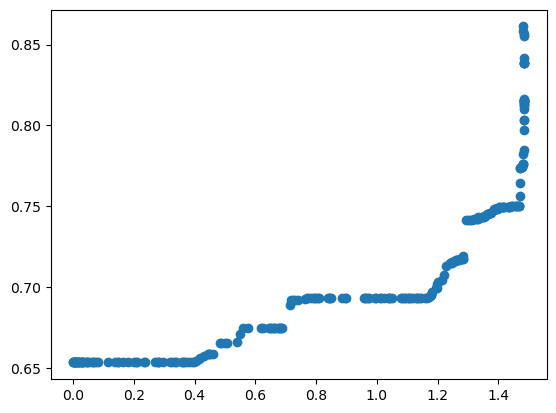

In [171]:
plt.scatter(Y_test_2, Y_predict_RFR_m_2_test_m_1)
mean_squared_error(Y_test_2,Y_predict_RFR_m_2_test_m_1)

In [173]:
np.shape(Y_predict_RFR_m_2)

(1000,)

0.06296378582503312

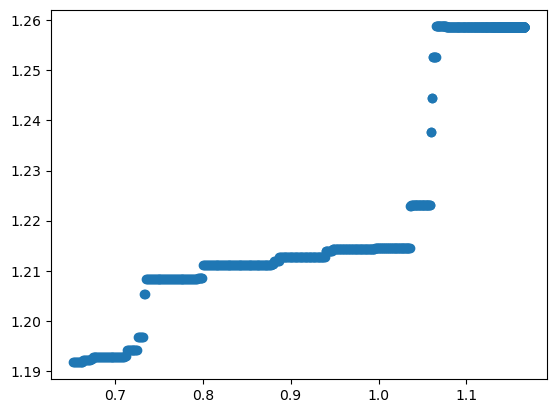

In [175]:
plt.scatter(g2_m_2, Y_predict_RFR_m_2)
mean_squared_error(g2_m_2,Y_predict_RFR_m_2)

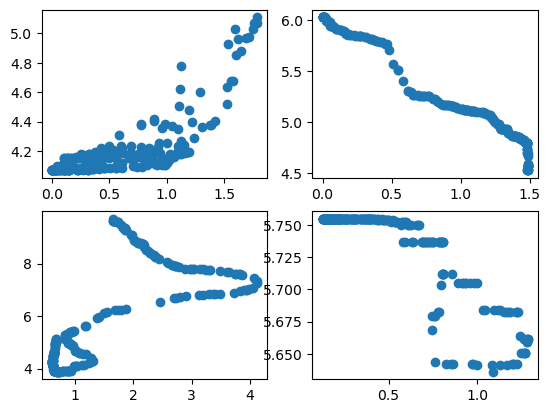

In [108]:
plt.subplot(2,2,1)
plt.scatter(Y_test_1, Y_predict_RFR_squ_1)
plt.subplot(2,2,2)
plt.scatter(Y_test_2, Y_predict_RFR_squ_2)
plt.subplot(2,2,3)
plt.scatter(Y_test_3, Y_predict_RFR_squ_3)
plt.subplot(2,2,4)
plt.scatter(Y_test_4, Y_predict_RFR_squ_4)
# plt.scatter(Y_test_2, Y_predict_RFR_squ_1)
# plt.scatter(Y_test_3, Y_predict_RFR_squ_1)
# plt.scatter(Y_test_4, Y_predict_RFR_squ_1)
# plt.scatter(g2_squ, Y_predict_2_squ)
# plt.scatter(g2_squ, Y_predict_3_squ)
# plt.scatter(g2_squ, Y_predict_4_squ)

In [51]:
regressor_1 = RandomForestRegressor()
regressor_1.fit(X_train_1, Y_train_1)

regressor_2 = RandomForestRegressor()
regressor_2.fit(X_train_2, Y_train_2)

regressor_3 = RandomForestRegressor()
regressor_3.fit(X_train_3, Y_train_3)

regressor_4 = RandomForestRegressor()
regressor_4.fit(X_train_4, Y_train_4)

Y_predict_RFR_1_1 = regressor_1.predict(X_test_1)
Y_predict_RFR_1_2 = regressor_1.predict(X_test_2) 
Y_predict_RFR_1_3 = regressor_1.predict(X_test_3)
Y_predict_RFR_1_4 = regressor_1.predict(X_test_4)
Y_predict_1_squ = regressor_1.predict(n_squ_new)

Y_predict_RFR_2_1 = regressor_2.predict(X_test_1)
Y_predict_RFR_2_2 = regressor_2.predict(X_test_2)
Y_predict_RFR_2_3 = regressor_2.predict(X_test_3)
Y_predict_RFR_2_4 = regressor_2.predict(X_test_4)
Y_predict_2_squ = regressor_2.predict(n_squ_new)

Y_predict_RFR_3_1 = regressor_3.predict(X_test_1)
Y_predict_RFR_3_2 = regressor_3.predict(X_test_2)
Y_predict_RFR_3_3 = regressor_3.predict(X_test_3)
Y_predict_RFR_3_4 = regressor_3.predict(X_test_4)
Y_predict_3_squ = regressor_3.predict(n_squ_new)

Y_predict_RFR_4_1 = regressor_4.predict(X_test_1)
Y_predict_RFR_4_2 = regressor_4.predict(X_test_2)
Y_predict_RFR_4_3 = regressor_4.predict(X_test_3)
Y_predict_RFR_4_4 = regressor_4.predict(X_test_4)
Y_predict_4_squ = regressor_4.predict(n_squ_new)

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

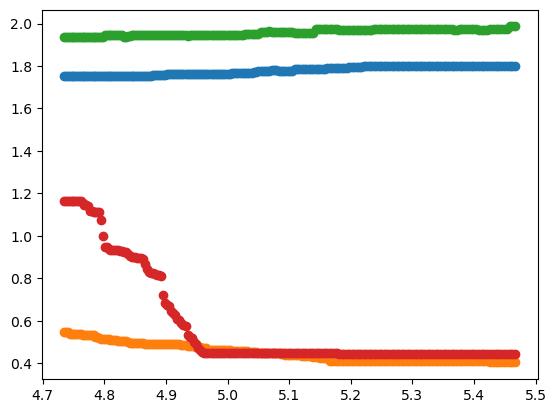

In [53]:
plt.scatter(g2_squ, Y_predict_1_squ)
plt.scatter(g2_squ, Y_predict_2_squ)
plt.scatter(g2_squ, Y_predict_3_squ)
plt.scatter(g2_squ, Y_predict_4_squ)

[0.0028791521040957445, 0.5124394504536693, 0.9873713208244527, 0.5038169529753715]


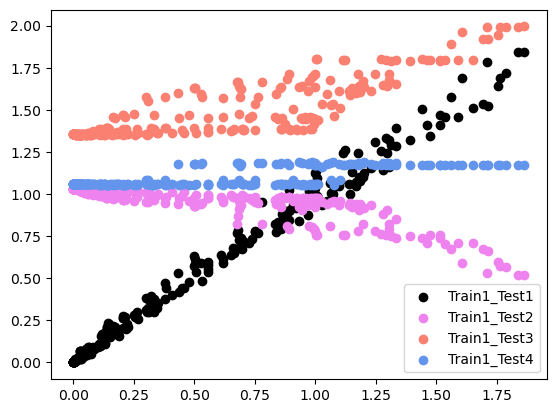

In [115]:
plt.scatter(Y_test_1, Y_predict_RFR_1_1, label='Train1_Test1', color='k')
plt.scatter(Y_test_1, Y_predict_RFR_2_1, label='Train1_Test2', color='violet')
plt.scatter(Y_test_1, Y_predict_RFR_3_1, label='Train1_Test3', color='salmon')
plt.scatter(Y_test_1, Y_predict_RFR_4_1, label='Train1_Test4', color='cornflowerblue')
error1 = [mean_squared_error(Y_test_1,Y_predict_RFR_1_1),mean_squared_error(Y_test_1,Y_predict_RFR_2_1),mean_squared_error(Y_test_1,Y_predict_RFR_3_1),mean_squared_error(Y_test_1,Y_predict_RFR_4_1)]
print(error1)
plt.legend()
plt.savefig('train1.png')

[0.8780698132952263, 1.3881244483070167e-06, 1.240837688686233, 0.37025411151815274]


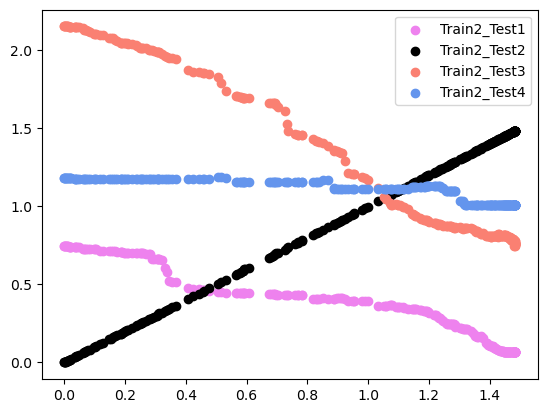

In [59]:
plt.scatter(Y_test_2, Y_predict_RFR_1_2, label='Train2_Test1', color='violet')
plt.scatter(Y_test_2, Y_predict_RFR_2_2, label='Train2_Test2', color='k')
plt.scatter(Y_test_2, Y_predict_RFR_3_2, label='Train2_Test3', color='salmon')
plt.scatter(Y_test_2, Y_predict_RFR_4_2, label='Train2_Test4', color='cornflowerblue')
error2 = [mean_squared_error(Y_test_2,Y_predict_RFR_1_2),mean_squared_error(Y_test_2,Y_predict_RFR_2_2),mean_squared_error(Y_test_2,Y_predict_RFR_3_2),mean_squared_error(Y_test_2,Y_predict_RFR_4_2)]
print(error2)
plt.legend()
plt.savefig('train2.png')

[1.557117273568357, 3.0275726918119585, 0.012107439737739426, 1.393257748353967]


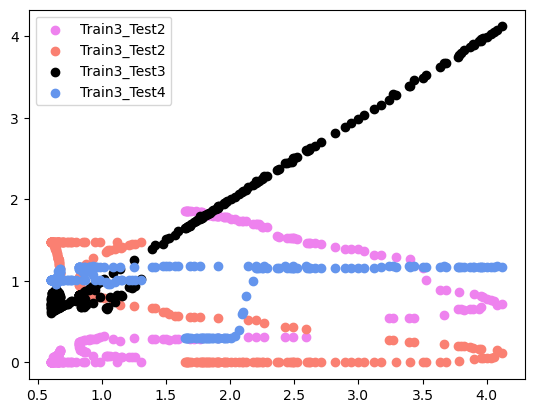

In [61]:
plt.scatter(Y_test_3, Y_predict_RFR_1_3, label='Train3_Test2', color='violet')
plt.scatter(Y_test_3, Y_predict_RFR_2_3, label='Train3_Test2', color='salmon')
plt.scatter(Y_test_3, Y_predict_RFR_3_3, label='Train3_Test3', color='k')
plt.scatter(Y_test_3, Y_predict_RFR_4_3, label='Train3_Test4', color='cornflowerblue')
error3 = [mean_squared_error(Y_test_3,Y_predict_RFR_1_3),mean_squared_error(Y_test_3,Y_predict_RFR_2_3),mean_squared_error(Y_test_3,Y_predict_RFR_3_3),mean_squared_error(Y_test_3,Y_predict_RFR_4_3)]
print(error3)
plt.legend()
plt.savefig('train3.png')

[0.15384665137470477, 0.12402806019198215, 1.6417966949776626, 6.964225554206954e-05]


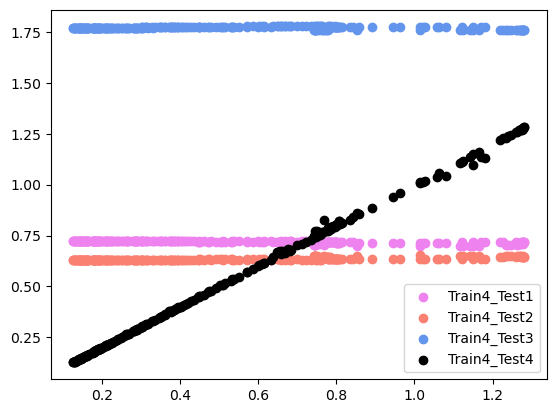

In [69]:
plt.scatter(Y_test_4, Y_predict_RFR_1_4, label='Train4_Test1', color='violet')
plt.scatter(Y_test_4, Y_predict_RFR_2_4, label='Train4_Test2', color='salmon')
plt.scatter(Y_test_4, Y_predict_RFR_3_4, label='Train4_Test3', color='cornflowerblue')
plt.scatter(Y_test_4, Y_predict_RFR_4_4, label='Train4_Test4', color='k')
error4 = [mean_squared_error(Y_test_4,Y_predict_RFR_1_4),mean_squared_error(Y_test_4,Y_predict_RFR_2_4),mean_squared_error(Y_test_4,Y_predict_RFR_3_4),mean_squared_error(Y_test_4,Y_predict_RFR_4_4)]
print(error4)
plt.legend()
plt.savefig('train4.png')

In [77]:
data = {"case1" : error1,
        "case2" : error2,
        "case3" : error3,
        "case4" : error4,
        
}

In [87]:
def draw_color_cell(x,color):
    color = f'background-color:{color}'
    return color

In [119]:
frame = pd.DataFrame(data,index = ['case1', 'case2', 'case3', 'case4'])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case1',['case1'],'case2',['case2']])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case2',['case2']])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case3',['case3']])
# frame.style.applymap(draw_color_cell,color='#ff9090',subset=pd.IndexSlice['case4',['case4']])
def highlight_diag(df):
    a = np.full(df.shape, '', dtype='<U24')
    np.fill_diagonal(a, 'background-color: yellow')
    return pd.DataFrame(a, index=df.index, columns=df.columns)

frame.style.apply(highlight_diag, axis=None)
# frame
# dfi.export(frame, 'df.png')
# fig = df2img.plot_dataframe(frame, fig_size=(500, 140))

# df2img.save_dataframe(fig=fig, filename="plot1.png")

,case1,case2,case3,case4
case1,0.003034,0.878070,1.557117,0.153847
case2,0.505315,0.000001,3.027573,0.124028
case3,0.990289,1.240838,0.012107,1.641797
case4,0.483793,0.370254,1.393258,0.000070


In [91]:
frame.index

Index(['case1', 'case2', 'case3', 'case4'], dtype='object')